In [1]:
import pandas as pd
import seaborn as sns
import pingouin as png

In [3]:
raw = pd.read_csv("https://raw.githubusercontent.com/ethanweed/ExPsyLing/master/datasets/Sentence-verification/2021/sentence-verification.csv")

In [139]:
df = pd.DataFrame({'participantID' : raw['sessionid'],
                  'condition' : raw['condition'],
                  'sentence' : raw['stim'],
                  'rt' : raw['response_time'],
                   'true_false' : raw['true_false'],
                  'correct' : raw['correct']})
condition = []
for x in list(df['condition']):
    if x == 'S2.':
        condition.append('S2')
    else:
        condition.append(x)

df['condition'] = condition

In [140]:
df.head()

,participantID,condition,sentence,rt,true_false,correct
0,1637220363788,P2,Bourbon is gritty.,1017,False,0
1,1637220363788,SO,A parakeet is an eagle.,1017,False,0
2,1637220363788,SO,Chicago is a state.,1017,False,0
3,1637220363788,PO,A canary can sing.,1016,True,0
4,1637220363788,P1,A canoe has a sail.,1017,False,0


In [158]:
data = df.groupby(['participantID', 'condition', 'true_false']).mean().reset_index()
data['participantID'] = [1]*data.shape[0]
data['participantID'] = data['participantID'].cumsum()
true_false = list(data['true_false'])
true_false = ["T" if x == True else "F" for x in true_false]
del data['true_false']
data.insert(loc = 4, column = 'true_false', value = true_false)
data.head()

,participantID,condition,rt,correct,true_false
0,1,P1,1016.0,0.0,F
1,2,P1,1016.0,0.0,T
2,3,PO,1015.0,0.0,F
3,4,S1,1016.0,0.0,T
4,5,P1,1016.0,0.0,F


<AxesSubplot:xlabel='condition', ylabel='rt'>

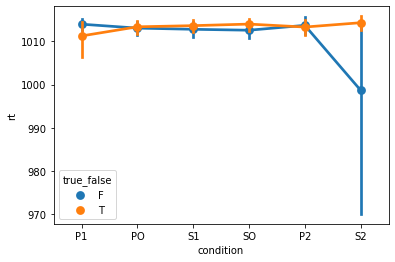

In [159]:
sns.pointplot(data = data, x = 'condition', y = 'rt', hue = 'true_false')

In [160]:
df.rm_anova(dv='rt', within = ['condition','true_false'], subject = 'participantID')

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,condition,1665.346579,5,105,333.069316,0.911683,0.476490,0.355976,0.041607,0.212374
1,true_false,386.144135,1,21,386.144135,1.036274,0.320275,0.320275,0.047026,1.000000
2,condition * true_false,2403.869794,5,105,480.773959,1.283567,0.276547,0.272649,0.057602,0.214029


In [161]:
wide = data
del wide['correct']
wide = data.pivot(columns = 'condition')
wide.head()

participantID                            rt                          \
condition            P1  P2   PO   S1  S2  SO      P1  P2      PO      S1  S2   
0                   1.0 NaN  NaN  NaN NaN NaN  1016.0 NaN     NaN     NaN NaN   
1                   2.0 NaN  NaN  NaN NaN NaN  1016.0 NaN     NaN     NaN NaN   
2                   NaN NaN  3.0  NaN NaN NaN     NaN NaN  1015.0     NaN NaN   
3                   NaN NaN  NaN  4.0 NaN NaN     NaN NaN     NaN  1016.0 NaN   
4                   5.0 NaN  NaN  NaN NaN NaN  1016.0 NaN     NaN     NaN NaN   

              true_false                           
condition  SO         P1   P2   PO   S1   S2   SO  
0         NaN          F  NaN  NaN  NaN  NaN  NaN  
1         NaN          T  NaN  NaN  NaN  NaN  NaN  
2         NaN        NaN  NaN    F  NaN  NaN  NaN  
3         NaN        NaN  NaN  NaN    T  NaN  NaN  
4         NaN          F  NaN  NaN  NaN  NaN  NaN

In [162]:
wide.to_csv('/Users/ethan/Desktop/sentence_verification.csv')